In [39]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [19]:
#Boston House Pricing Dataset

df = pd.read_csv(r'C:\Users\HP\Desktop\Data Science\Data Sets For Practice\HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [24]:
df.shape

(506, 14)

In [30]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [31]:
df.dropna(inplace=True)

In [38]:
df.shape

(394, 14)

In [32]:
X = df.drop('MEDV',axis=1)
y = df['MEDV']

In [33]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21


In [166]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.70,random_state=50)

In [167]:
from sklearn.tree import DecisionTreeRegressor

In [168]:
regressor = DecisionTreeRegressor()

In [169]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [170]:
from sklearn.metrics import r2_score

y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

In [171]:
print("Train Performance :", r2_score(y_train, y_train_pred))
print("Test Performance :", r2_score(y_test, y_test_pred))

Train Performance : 1.0
Test Performance : 0.45688646737179384


Model is Overfitted

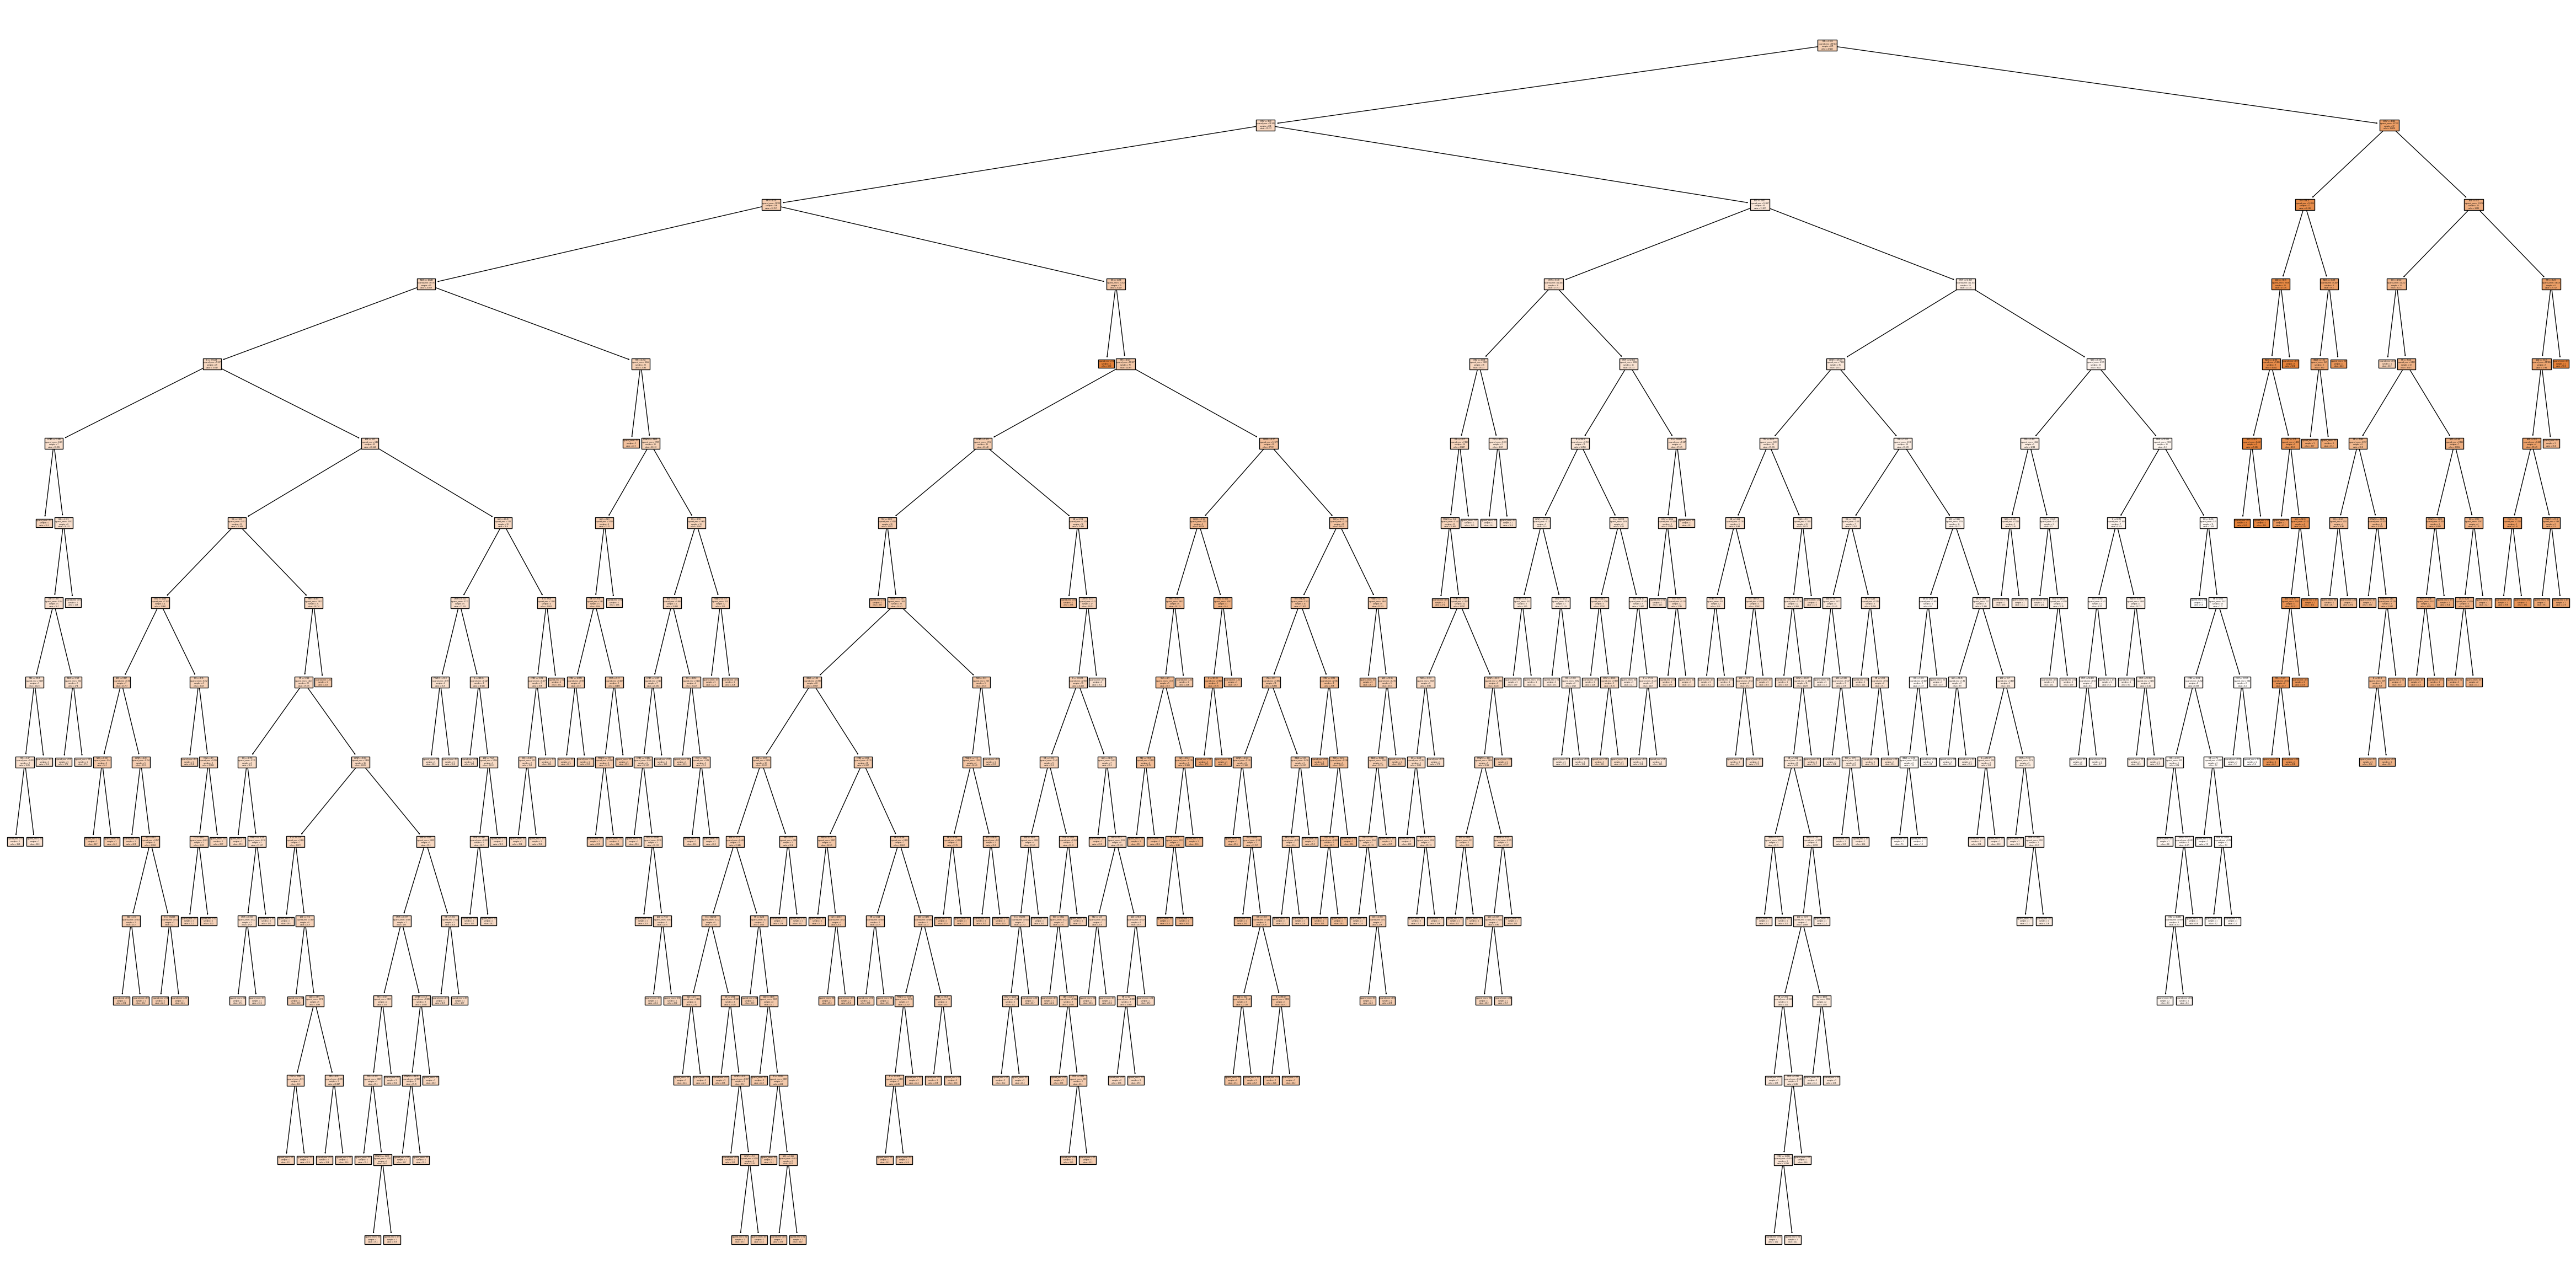

In [51]:
from sklearn.tree import plot_tree

plt.figure(figsize=(60,30))

plot_tree(regressor, feature_names = X.columns,filled=True);

# To avoid, prevent, reduce the Overfitting in the decision tree model we use hyperparameter tunning using (GridSearchCV)

In [60]:
regressor = DecisionTreeRegressor()

In [54]:
# Create the parameter grid based on the results of random search 
params = {
    'splitter' : ["best", "random"],
    'max_depth': [*range(1,20)],
    'min_samples_split':[*range(1,20,1)],
    'min_samples_leaf': [*range(1,20,1)],
    'criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    'max_features' : ["auto", "sqrt", "log2"]
}

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
# https://scikit-learn.org/stable/modules/model_evaluation.html (parameters of GridSearchCV)

grid_search = GridSearchCV(estimator=regressor, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=1, scoring = "r2")

In [63]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 22344 candidates, totalling 111720 fits
Wall time: 2min 54s


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 4, 7, 10, 13, 16, 19],
                         'min_samples_split': [1, 4, 7, 10, 13, 16, 19],
                         'splitter': ['best', 'random']},
             scoring='r2', verbose=1)

In [64]:
grid_search.cv_results_

{'mean_fit_time': array([0.02218657, 0.01559606, 0.01188288, ..., 0.00319939, 0.0032002 ,
        0.00479922]),
 'std_fit_time': array([0.00100269, 0.0087682 , 0.00732612, ..., 0.00391843, 0.00391943,
        0.00391855]),
 'mean_score_time': array([0.        , 0.        , 0.01105323, ..., 0.00480022, 0.00319982,
        0.00319972]),
 'std_score_time': array([0.        , 0.        , 0.00492911, ..., 0.00391937, 0.00391896,
        0.00391884]),
 'param_criterion': masked_array(data=['squared_error', 'squared_error', 'squared_error', ...,
                    'poisson', 'poisson', 'poisson'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[1, 1, 1, ..., 19, 19, 19],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=['auto', 'auto', 'auto', ..., 'log2', 'log2', 'log2'],

In [65]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.022187,0.001003,0.000000,0.000000,squared_error,1,auto,1,1,best,"{'criterion': 'squared_error', 'max_depth': 1,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,22344
1,0.015596,0.008768,0.000000,0.000000,squared_error,1,auto,1,1,random,"{'criterion': 'squared_error', 'max_depth': 1,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,20015
2,0.011883,0.007326,0.011053,0.004929,squared_error,1,auto,1,4,best,"{'criterion': 'squared_error', 'max_depth': 1,...",0.622654,0.446874,0.166224,0.351901,0.519258,0.421382,0.155353,12036
3,0.007114,0.002571,0.004119,0.002061,squared_error,1,auto,1,4,random,"{'criterion': 'squared_error', 'max_depth': 1,...",0.536013,0.178611,0.281930,0.497453,0.355459,0.369893,0.132968,13457
4,0.003968,0.003648,0.003870,0.004740,squared_error,1,auto,1,7,best,"{'criterion': 'squared_error', 'max_depth': 1,...",0.622654,0.446874,0.166224,0.351901,0.519258,0.421382,0.155353,12049


In [66]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2079,0.002905,0.001336,0.006755,0.001579,squared_error,8,auto,4,10,random,"{'criterion': 'squared_error', 'max_depth': 8,...",0.871962,0.802429,0.803277,0.803007,0.772115,0.810558,0.032938,1
2068,0.005262,0.001957,0.011388,0.011512,squared_error,8,auto,1,16,best,"{'criterion': 'squared_error', 'max_depth': 8,...",0.888301,0.793961,0.737662,0.775736,0.813932,0.801919,0.049968,2
7654,0.006500,0.001864,0.003506,0.001833,friedman_mse,8,auto,1,16,best,"{'criterion': 'friedman_mse', 'max_depth': 8, ...",0.888301,0.793961,0.737662,0.775736,0.811754,0.801483,0.049871,3
7360,0.004680,0.000897,0.005495,0.000815,friedman_mse,7,auto,1,16,best,"{'criterion': 'friedman_mse', 'max_depth': 7, ...",0.886682,0.800981,0.728803,0.776734,0.809836,0.800607,0.051420,4
2656,0.004930,0.001569,0.004823,0.001609,squared_error,10,auto,1,16,best,"{'criterion': 'squared_error', 'max_depth': 10...",0.889718,0.793961,0.725788,0.777332,0.814724,0.800305,0.053523,5


In [67]:
grid_search.best_estimator_

DecisionTreeRegressor(max_depth=8, max_features='auto', min_samples_leaf=4,
                      min_samples_split=10, splitter='random')

In [68]:
grid_search.best_params_

{'criterion': 'squared_error',
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'splitter': 'random'}

In [69]:
grid_search.predict(X_train)

array([35.5       , 19.49333333, 22.525     , 25.05      , 21.725     ,
       19.49333333,  9.63333333, 25.9       ,  9.63333333, 21.725     ,
       20.2       , 34.45714286,  9.63333333, 44.0125    , 42.8       ,
       28.4       , 14.83      , 21.56666667, 16.1       , 33.74444444,
       19.34285714, 33.74444444, 36.16      , 14.025     , 26.17142857,
       33.74444444, 19.92857143, 10.7       , 19.34285714, 44.0125    ,
       19.56666667, 26.825     , 42.8       , 21.725     , 14.83      ,
       17.62      , 20.95      ,  9.63333333, 23.61666667, 36.16      ,
       21.725     , 33.74444444, 42.8       , 26.825     , 11.58571429,
        8.91428571, 23.61666667, 19.34285714, 34.45714286, 25.9       ,
       42.8       , 44.0125    , 23.61666667,  8.15      , 21.725     ,
       17.62      , 11.58571429, 27.81666667, 20.2       , 18.87777778,
       14.83      , 20.95      , 35.5       , 42.8       , 24.85      ,
       29.62      , 18.87777778, 19.49333333, 25.05      , 19.34

In [153]:
regressor1 = DecisionTreeRegressor(criterion = 'squared_error',max_depth=8, max_features='auto', min_samples_leaf=4,
                                   min_samples_split=10, splitter='random')

In [154]:
regressor1.fit(X_train,y_train)


DecisionTreeRegressor(max_depth=8, max_features='auto', min_samples_leaf=4,
                      min_samples_split=10, splitter='random')

In [155]:
y_train_pred = regressor1.predict(X_train)
y_test_pred = regressor1.predict(X_test)

In [156]:
print("Train Performance :", r2_score(y_train, y_train_pred))
print("Test Performance :", r2_score(y_test, y_test_pred))

Train Performance : 0.8776885434486397
Test Performance : 0.7108072657089862


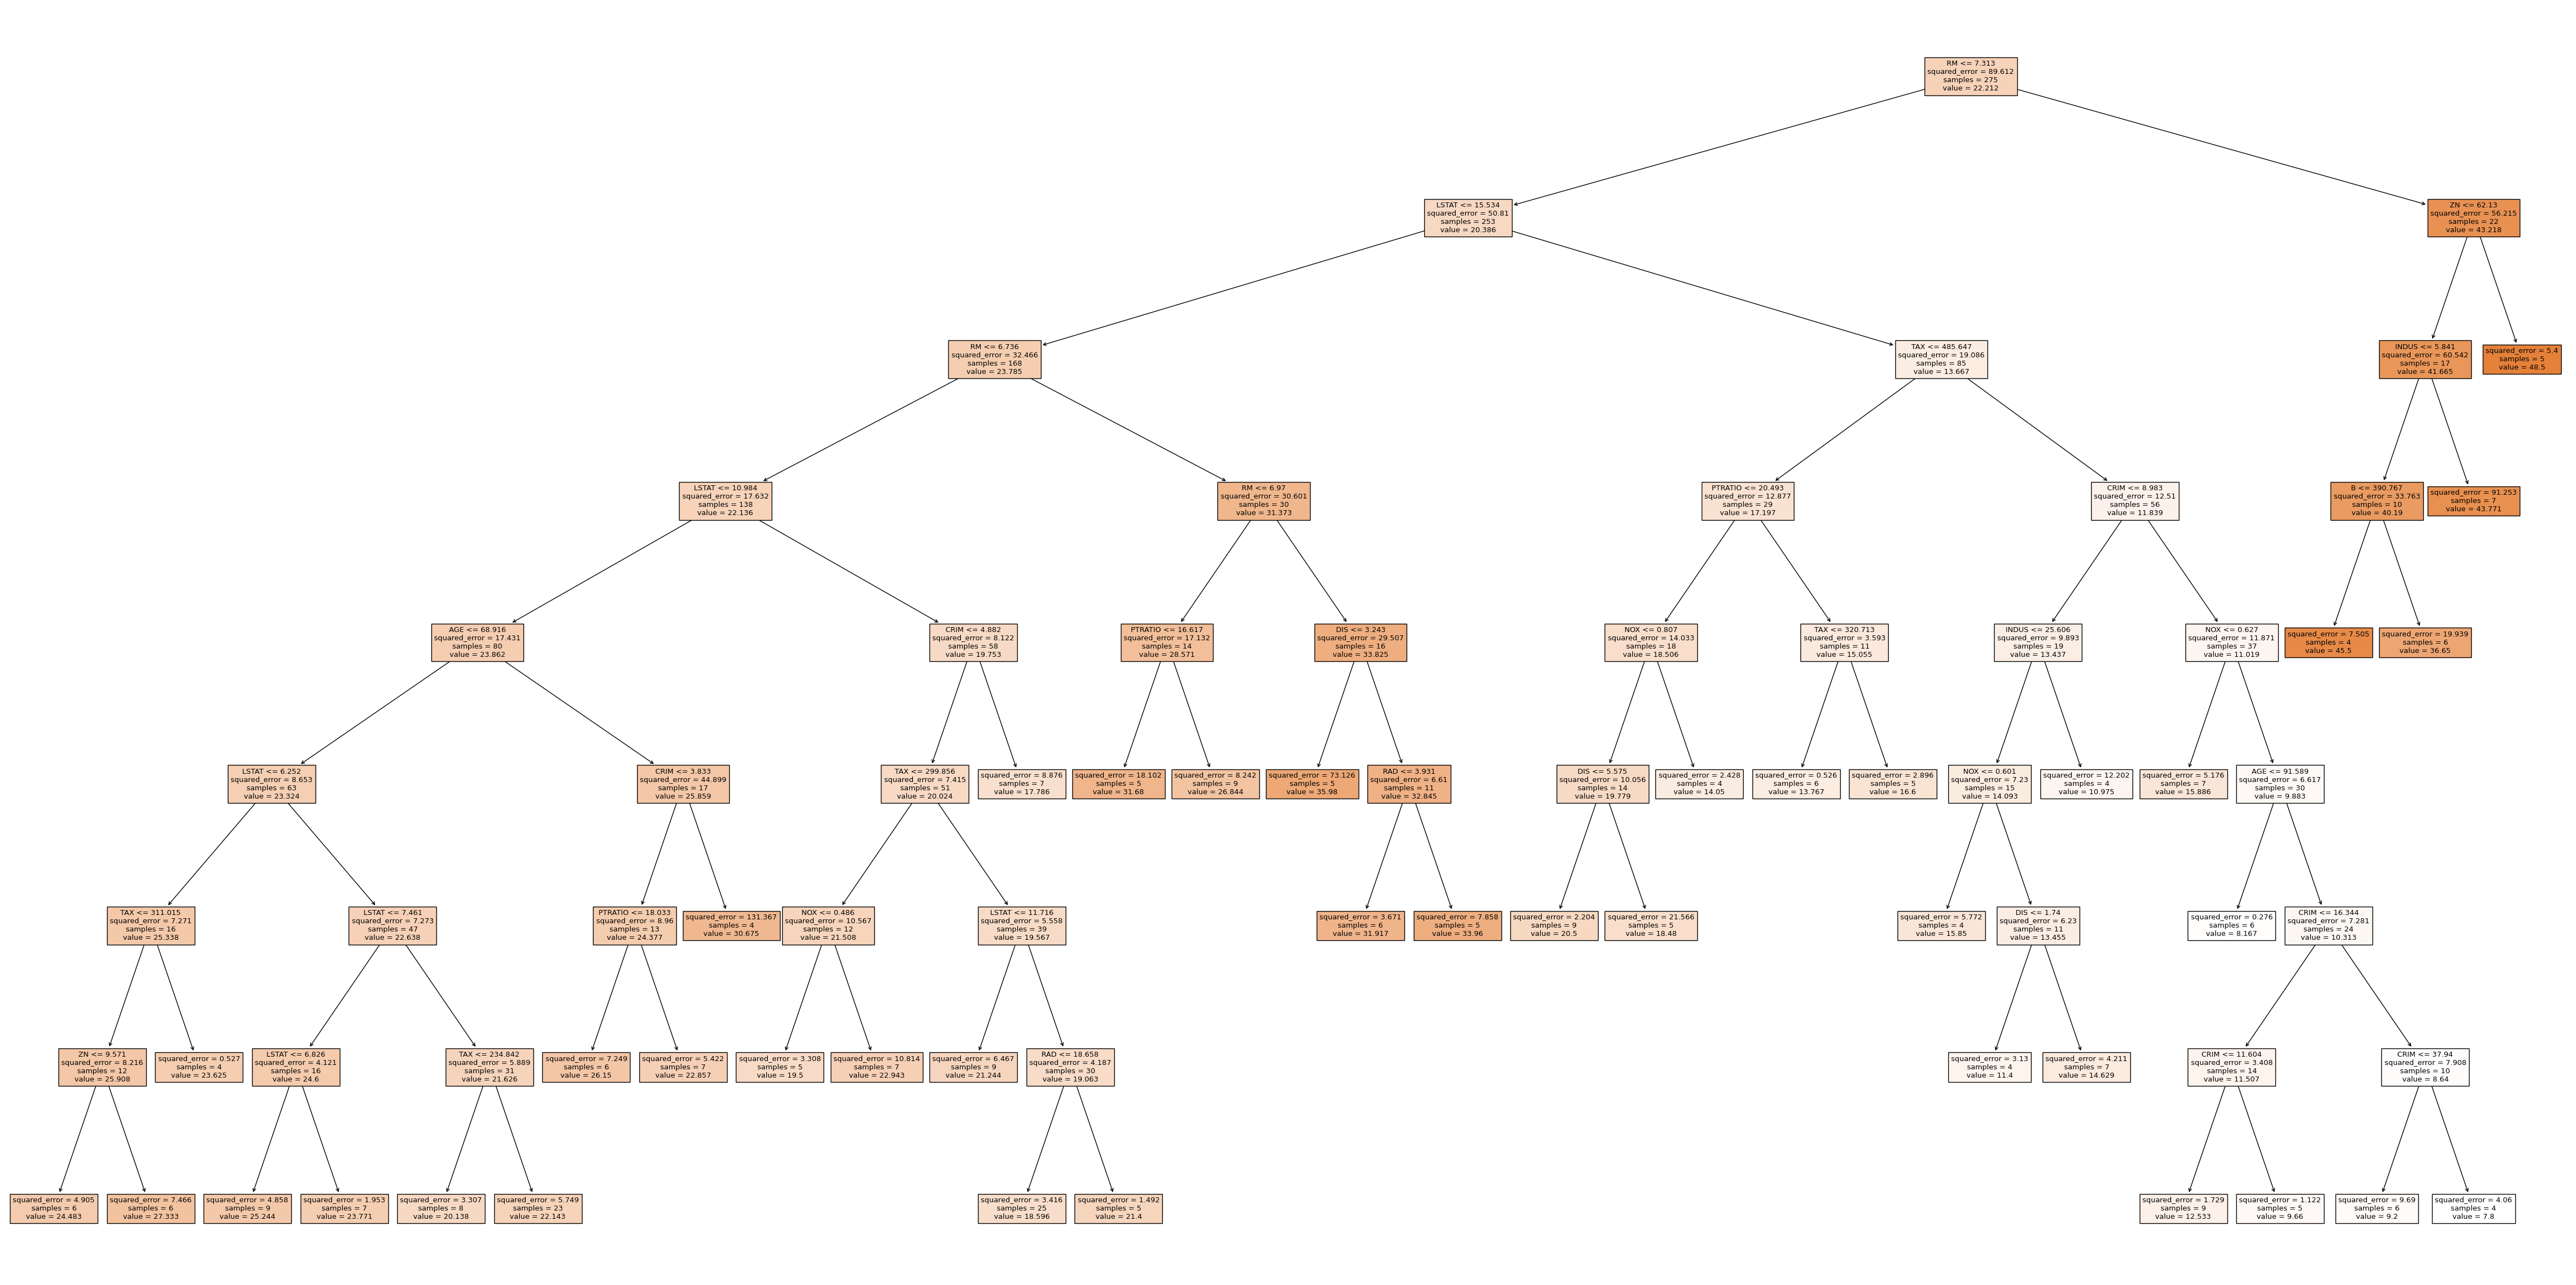

In [172]:
plt.figure(figsize=(60,30))

plot_tree(regressor1, feature_names = X.columns,filled=True);